In [1]:
##############
############## EXPLORE DATA
##############

In [2]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from scipy import stats

In [3]:
%matplotlib inline

In [69]:
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")
test = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/test.csv")
sample = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/sample_submission.csv")
trains = train[:5000]
tests = test[:5000]

In [5]:
sample.head()

,ID,PredictedProb
0,0,0.5
1,1,0.5
2,2,0.5
3,7,0.5
4,10,0.5


In [6]:
trains.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [7]:
tests.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [8]:
sample.head()

,ID,PredictedProb
0,0,0.5
1,1,0.5
2,2,0.5
3,7,0.5
4,10,0.5


In [9]:
trainclean = trains.fillna(0).head()
trainclean

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,C,0.000000,9.191265,0.000000,0.000000,2.301630,...,0.000000,0.000000,0.598896,AF,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,0.000000,0.000000,C,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Z,0.000000,0.000000,0.000000,0,0.000000,0.000000


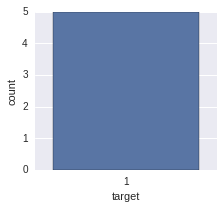

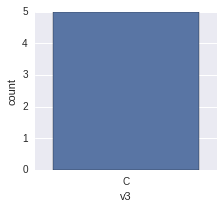

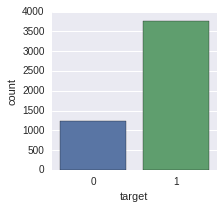

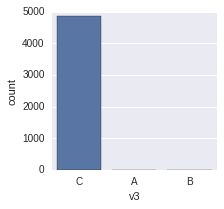

In [10]:
sns.factorplot('target',data=trainclean,kind='count',size=3)
sns.factorplot('v3',data=trainclean,kind='count',size=3)
sns.factorplot('target',data=trains,kind='count',size=3)
sns.factorplot('v3',data=trains,kind='count',size=3)

In [11]:
trains.loc[trains['v3'] == "A"]

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
1031,2032,1,2.138728,11.262827,A,5.418991,9.845327,1.926782,2.581889,0.043371,...,6.666666,0.935229,0.278880,V,1.444342,2.492774,4.463485,2,1.223880,2.926830
1360,2694,1,1.150855,12.118168,A,4.551629,9.191264,2.721618,2.931570,2.301630,...,6.412213,1.420637,0.598896,AF,1.444587,2.012053,1.957825,1,1.092838,1.553397
1464,2902,1,1.428227,6.031662,A,5.546056,10.741116,2.036188,2.330520,8.022925,...,6.402640,3.043932,11.549883,AZ,1.452025,2.623644,5.433482,1,1.962733,1.350212
1933,3896,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AR,NaN,NaN,NaN,1,NaN,NaN
2013,4056,1,1.735731,11.334333,A,3.825931,8.643161,2.048475,2.197029,11.245300,...,5.398772,3.486510,1.472451,BH,2.055575,6.215794,1.875762,2,1.651245,2.068966
2025,4074,1,1.767868,4.329228,A,4.421207,10.827169,2.858849,2.516424,0.220787,...,7.142856,3.361024,0.028551,BL,1.436129,4.643639,2.784175,1,1.183544,2.566844
3371,6700,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BH,NaN,NaN,NaN,2,NaN,NaN
3399,6760,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AC,NaN,NaN,NaN,1,NaN,NaN
4790,9572,0,2.847306,8.996227,A,5.348026,10.875775,2.219523,2.486836,5.234731,...,6.301370,2.134766,7.748497,AR,1.056036,5.315917,5.164720,1,1.237786,3.999999


In [12]:
trainclean.loc[trainclean['v3'] == 'A']

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131


In [13]:
################
################ CLEAN DATA
################

In [14]:
### Float Data

In [15]:
trains.loc[:, trains.dtypes == np.float64].head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Do I have NaN values?
trains.loc[:, trains.dtypes == np.float64].isnull().sum().sum()

219324

In [17]:
### Type of distribution of my data

dist = {}
# Normalize data for each column
columns = trains.columns[(trains.dtypes == np.float64)]
for i in range(len(columns)):
    trains.update(trains[columns[i]].notnull().apply(lambda x: (x - x.mean()) / (x.max() - x.min())).dropna())
    # check if normal distribution
    hyp = stats.shapiro(trains[columns[i]])
    # if p-value < 0.05 is not normally distributed
    if hyp[1] < 0.05:
        dist[i] = "nonnormal"
    else:
        dist[i] = "normal"
print(dist)

{0: 'normal', 1: 'normal', 2: 'normal', 3: 'normal', 4: 'normal', 5: 'normal', 6: 'normal', 7: 'normal', 8: 'normal', 9: 'normal', 10: 'normal', 11: 'normal', 12: 'nonnormal', 13: 'normal', 14: 'normal', 15: 'normal', 16: 'normal', 17: 'normal', 18: 'normal', 19: 'normal', 20: 'normal', 21: 'normal', 22: 'normal', 23: 'normal', 24: 'normal', 25: 'normal', 26: 'normal', 27: 'normal', 28: 'normal', 29: 'normal', 30: 'normal', 31: 'normal', 32: 'normal', 33: 'normal', 34: 'normal', 35: 'normal', 36: 'normal', 37: 'normal', 38: 'normal', 39: 'normal', 40: 'normal', 41: 'normal', 42: 'normal', 43: 'normal', 44: 'normal', 45: 'normal', 46: 'normal', 47: 'normal', 48: 'normal', 49: 'normal', 50: 'normal', 51: 'normal', 52: 'normal', 53: 'normal', 54: 'normal', 55: 'normal', 56: 'normal', 57: 'normal', 58: 'normal', 59: 'normal', 60: 'normal', 61: 'normal', 62: 'normal', 63: 'normal', 64: 'normal', 65: 'normal', 66: 'normal', 67: 'normal', 68: 'normal', 69: 'normal', 70: 'normal', 71: 'normal'

In [18]:
# plot a couple of features to see the distribution they follow
#f, ax = plt.subplots(2)
#sns.distplot(trains['v1'], bins=25, kde=False, rug=True, ax=ax[0])
#sns.distplot(trains['v15'], bins=25, kde=False, rug=True, ax=ax[1])
#sns.distplot(trains['v34'], bins=25, kde=False, rug=True, ax=ax[2])
#sns.distplot(trains['v45'], bins=25, kde=False, rug=True, ax=ax[3])
#sns.distplot(trains['v60'], bins=25, kde=False, rug=True, ax=ax[4])
#sns.distplot(trains['v78'], bins=25, kde=False, rug=True, ax=ax[5])
#sns.distplot(trains['v90'], bins=25, kde=False, rug=True, ax=ax[6])
#sns.distplot(trains['v108'], bins=25, kde=False, rug=True, ax=ax[7])
#sns.distplot(trains['v130'], bins=25, kde=False, rug=True, ax=ax[8])

In [19]:
# substitute in float data NaN by median value 
# save values into a numpy array(n_samples,n_features)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(trains.loc[:, trains.dtypes == np.float64])
X = trains.loc[:, trains.dtypes == np.float64]
floatFeatures = pd.DataFrame(imp.transform(X))
floatFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,1.478275,6.817772,4.182575,9.191265,2.400521,2.447117,2.301630,9.108172,1.312910,15.511311,...,1.164874,2.457737,6.779235,2.766150,0.598896,1.611466,2.965299,1.957825,1.593623,1.592920
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,1.478275,6.817772,4.182575,8.641835,2.400521,2.447117,0.391733,9.108172,1.050328,15.511311,...,1.164874,2.457737,6.779235,2.766150,0.137220,1.611466,2.965299,1.789658,1.593623,1.592920


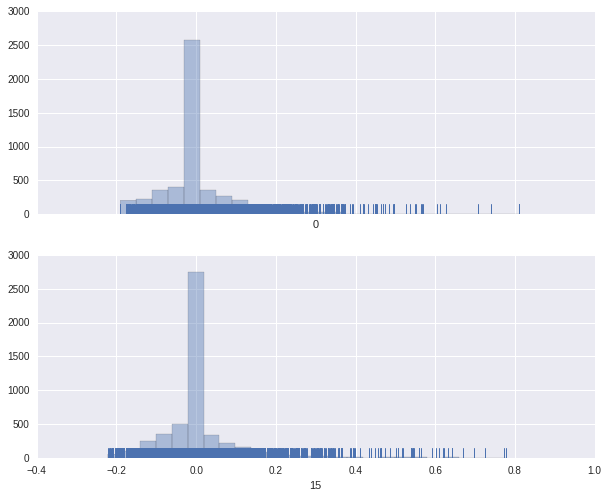

In [20]:
# plot a couple of features to see the distribution they follow once the median is applied to NaN
contdata2 = floatFeatures.apply(lambda x: (x - x.mean()) / (x.max() - x.min())).dropna()
f, ax = plt.subplots(2, sharex=True, figsize=(10,8))
sns.distplot(contdata2[0], bins=25, kde=False, rug=True, ax=ax[0])
sns.distplot(contdata2[15], bins=25, kde=False, rug=True, ax=ax[1])
#sns.distplot(contdata2[29], bins=25, kde=False, rug=True, ax=ax[2])
#sns.distplot(contdata2[39], bins=25, kde=False, rug=True, ax=ax[3])
#sns.distplot(contdata2[51], bins=25, kde=False, rug=True, ax=ax[4])
#sns.distplot(contdata2[63], bins=25, kde=False, rug=True, ax=ax[5])
#sns.distplot(contdata2[74], bins=25, kde=False, rug=True, ax=ax[6])
#sns.distplot(contdata2[89], bins=25, kde=False, rug=True, ax=ax[7])
#sns.distplot(contdata2[107], bins=25, kde=False, rug=True, ax=ax[8])

In [21]:
### Integers Categorical Data

In [22]:
trains.loc[:, trains.dtypes == np.int].head()

,ID,target,v38,v62,v72,v129
0,3,1,0,1,1,0
1,4,1,0,2,2,0
2,5,1,0,1,3,2
3,6,1,0,1,2,1
4,8,1,0,1,1,0


In [23]:
# Do I have NaN values?
trains.loc[:, trains.dtypes == np.int].isnull().sum().sum()

0

In [24]:
# No NaN values

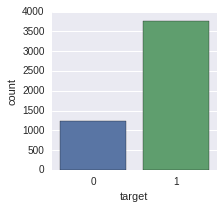

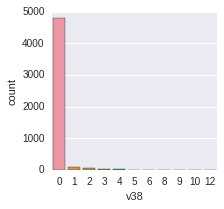

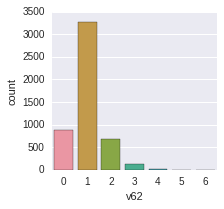

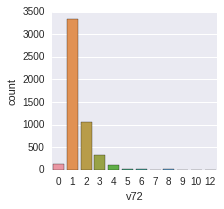

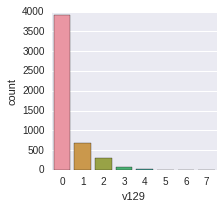

In [25]:
sns.factorplot('target',data=trains,kind='count',size=3)
sns.factorplot('v38',data=trains,kind='count',size=3)
sns.factorplot('v62',data=trains,kind='count',size=3)
sns.factorplot('v72',data=trains,kind='count',size=3)
sns.factorplot('v129',data=trains,kind='count',size=3)

In [26]:
# Transform each category into one boolean feature

In [27]:
enc = preprocessing.OneHotEncoder()
columns = trains.columns[(trains.dtypes == np.int)]
# exclude first column of IDs
enc = enc.fit(trains.loc[:, columns[2:]])
enc.feature_indices_

array([ 0, 13, 20, 33, 41])

In [28]:
enc.n_values_

array([13,  7, 13,  8])

In [29]:
columns

Index(['ID', 'target', 'v38', 'v62', 'v72', 'v129'], dtype='object')

In [30]:
trains.loc[:, columns[0]].unique()

array([   3,    4,    5, ..., 9970, 9972, 9973])

In [31]:
trains.loc[:, columns[2:]].head()

,v38,v62,v72,v129
0,0,1,1,0
1,0,2,2,0
2,0,1,3,2
3,0,1,2,1
4,0,1,1,0


In [32]:
x = enc.transform(trains.loc[:, columns[2:]]).toarray()
intFeatures = pd.DataFrame(x)
intFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
### Objects Categorical Data

In [34]:
trains.loc[:, trains.dtypes == np.object].head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


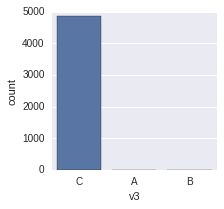

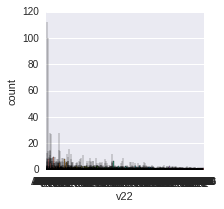

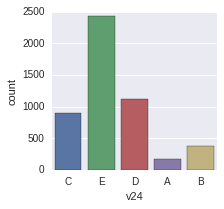

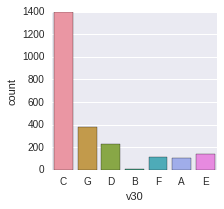

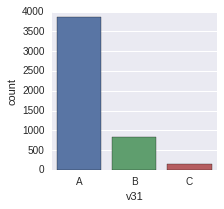

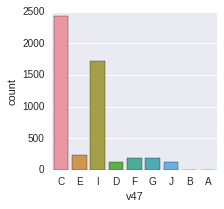

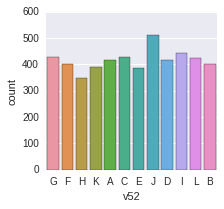

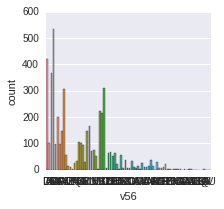

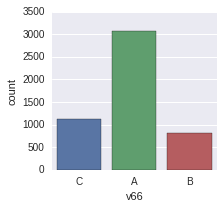

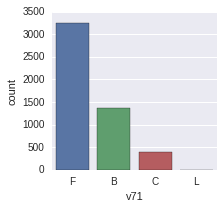

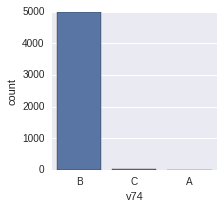

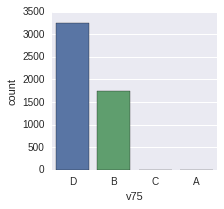

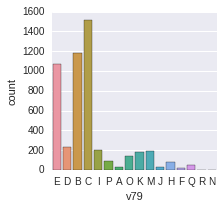

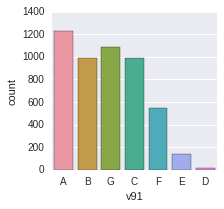

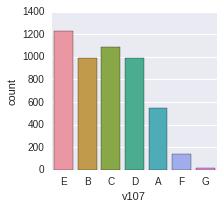

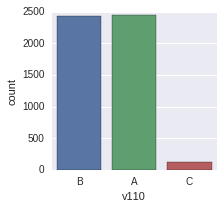

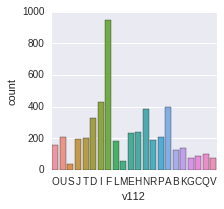

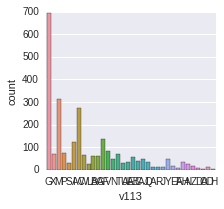

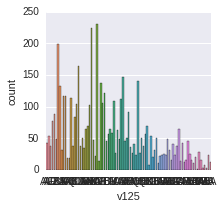

In [35]:
sns.factorplot('v3',data=trains,kind='count',size=3)
sns.factorplot('v22',data=trains,kind='count',size=3)
sns.factorplot('v24',data=trains,kind='count',size=3)
sns.factorplot('v30',data=trains,kind='count',size=3)
sns.factorplot('v31',data=trains,kind='count',size=3)
sns.factorplot('v47',data=trains,kind='count',size=3)
sns.factorplot('v52',data=trains,kind='count',size=3)
sns.factorplot('v56',data=trains,kind='count',size=3)
sns.factorplot('v66',data=trains,kind='count',size=3)
sns.factorplot('v71',data=trains,kind='count',size=3)
sns.factorplot('v74',data=trains,kind='count',size=3)
sns.factorplot('v75',data=trains,kind='count',size=3)
sns.factorplot('v79',data=trains,kind='count',size=3)
sns.factorplot('v91',data=trains,kind='count',size=3)
sns.factorplot('v107',data=trains,kind='count',size=3)
sns.factorplot('v110',data=trains,kind='count',size=3)
sns.factorplot('v112',data=trains,kind='count',size=3)
sns.factorplot('v113',data=trains,kind='count',size=3)
sns.factorplot('v125',data=trains,kind='count',size=3)

In [36]:
# Do I have NaN values?
trains.loc[:, trains.dtypes == np.object].isnull().sum().sum()

5663

In [37]:
# First transform object data type into categorical
# Second change categorical string data into integers

In [38]:
# change np.object into np.categorical
columns = trains.columns[(trains.dtypes == np.object)]  
for i in range(len(columns)):
    # convert to categorical
    trains[columns[i]] = trains[columns[i]].astype('category')
    # convert to integers (NaN == -1)
    trains[columns[i]] = trains[columns[i]].cat.codes

In [39]:
# Third substitute in float data NaN by mean value 
imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
imp.fit(trains[columns[:]])
X = trains[columns[:]]
X.head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,2,2727,2,2,0,2,6,54,2,2,1,3,4,0,4,1,14,-1,21
1,2,1256,2,2,0,4,6,66,0,2,1,3,3,1,1,0,20,15,6
2,2,1138,4,-1,0,2,5,12,0,0,1,1,4,6,2,1,18,-1,5
3,2,250,3,2,1,2,7,31,0,2,1,3,1,1,1,1,9,-1,63
4,2,1305,4,-1,0,7,7,-1,2,2,1,3,2,6,2,0,19,15,88


In [40]:
objpreFeatures = pd.DataFrame(imp.transform(X))
objpreFeatures.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2,2727,2,2,0,2,6,54,2,2,1,3,4,0,4,1,14,15,21
1,2,1256,2,2,0,4,6,66,0,2,1,3,3,1,1,0,20,15,6
2,2,1138,4,2,0,2,5,12,0,0,1,1,4,6,2,1,18,15,5
3,2,250,3,2,1,2,7,31,0,2,1,3,1,1,1,1,9,15,63
4,2,1305,4,2,0,7,7,31,2,2,1,3,2,6,2,0,19,15,88


In [41]:
# Forth Transform each category into one boolean feature

In [42]:
enc = preprocessing.OneHotEncoder()
enc = enc.fit(objpreFeatures)
x = enc.transform(objpreFeatures).toarray()
x

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.]])

In [43]:
intFeatures = pd.DataFrame(x)
intFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,3279,3280,3281,3282,3283,3284,3285,3286,3287,3288
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
